In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install squarify
import squarify

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/05. MY DOCUMENT/MY PORTOFOLIO PROJECT/Transaction/transaksi_monas_juli.csv')

In [ ]:
df.head(10)

,No,Date,Outlet,Table/Customer,Invoice,Delivery Fee,Transaction Number,Category,SKU,Product,...,Refund,Payment,Note,Dinein,User,Promo,Order From,Nama Penerima,Alamat Penerima,Link Maps
0,1.0,1/7/2025 5:47,Halte Monas,Guest 1,PC7942970-13852010725001,0,44313398.0,Minuman Dingin,MD01,Le Minerale 600 ML,...,NaN,Cash,NaN,takeaway,Virnanda,NaN,cashier,NaN,NaN,NaN
1,2.0,1/7/2025 5:54,Halte Monas,Guest 5,PC7942970-13852010725002,0,44313399.0,Roti Spesial,RS04,Roti Sisir,...,NaN,Cash,NaN,takeaway,Virnanda,NaN,cashier,NaN,NaN,NaN
2,NaN,1/7/2025 5:54,Halte Monas,Guest 5,PC7942970-13852010725002,0,44313399.0,Roti Spesial,RS09,Roti Sosis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1/7/2025 6:01,Halte Monas,Guest 9,PC7942970-13852010725003,0,44313400.0,Roti Spesial,RS05,Roti Boy,...,NaN,Qris Static,NaN,takeaway,Virnanda,NaN,cashier,NaN,NaN,NaN
4,NaN,1/7/2025 6:01,Halte Monas,Guest 9,PC7942970-13852010725003,0,44313400.0,Roti Spesial,RS09,Roti Sosis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,1/7/2025 6:08,Halte Monas,Guest 13,PC7942970-13852010725004,0,44313401.0,Makanan Berat,MB02,Nasi Goreng,...,NaN,Cash,NaN,takeaway,Virnanda,NaN,cashier,NaN,NaN,NaN
6,NaN,1/7/2025 6:08,Halte Monas,Guest 13,PC7942970-13852010725004,0,44313401.0,Koedapan Asin,KA07,Sosis Solo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,1/7/2025 6:09,Halte Monas,Guest 17,PC7942970-13852010725005,0,44313402.0,Makanan Berat,MB02,Nasi Goreng,...,NaN,Qris Static,NaN,takeaway,Virnanda,NaN,cashier,NaN,NaN,NaN
8,6.0,1/7/2025 6:20,Halte Monas,Guest 21,PC7942970-13852010725006,0,44313403.0,Roti Spesial,RS01,Roti Pizza,...,NaN,Cash,NaN,takeaway,Virnanda,NaN,cashier,NaN,NaN,NaN
9,NaN,1/7/2025 6:20,Halte Monas,Guest 21,PC7942970-13852010725006,0,44313403.0,Minuman Dingin,MD01,Le Minerale 600 ML,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



# **Python Mini Project – Data Analysis Tasks**

**Monthly Revenue**

   Calculate and display the total revenue for each month.

**Category Quantity Distribution**

   Count the total quantity sold per category, then sort the results in descending order.

**Product Quantity Distribution**

  Count the total quantity sold per product, then sort the results in descending order.

**Payment Method Comparison**

   Compare the usage frequency of each payment method (e.g., cash, credit, e-wallet) and visualize the distribution.


In [ ]:
# ___________ CLEANING DATA _____________
df_clean = df[['No','Date','Category','Product','Quantity','Price','Subtotal','Payment']]
df_clean.head(10)

,No,Date,Category,Product,Quantity,Price,Subtotal,Payment
0,1.0,1/7/2025 5:47,Minuman Dingin,Le Minerale 600 ML,1.0,5000.0,5000.0,Cash
1,2.0,1/7/2025 5:54,Roti Spesial,Roti Sisir,1.0,8000.0,16000.0,Cash
2,NaN,1/7/2025 5:54,Roti Spesial,Roti Sosis,1.0,8000.0,NaN,NaN
3,3.0,1/7/2025 6:01,Roti Spesial,Roti Boy,1.0,8000.0,16000.0,Qris Static
4,NaN,1/7/2025 6:01,Roti Spesial,Roti Sosis,1.0,8000.0,NaN,NaN
5,4.0,1/7/2025 6:08,Makanan Berat,Nasi Goreng,1.0,17000.0,24000.0,Cash
6,NaN,1/7/2025 6:08,Koedapan Asin,Sosis Solo,1.0,7000.0,NaN,NaN
7,5.0,1/7/2025 6:09,Makanan Berat,Nasi Goreng,1.0,17000.0,17000.0,Qris Static
8,6.0,1/7/2025 6:20,Roti Spesial,Roti Pizza,1.0,8000.0,21000.0,Cash
9,NaN,1/7/2025 6:20,Minuman Dingin,Le Minerale 600 ML,1.0,5000.0,NaN,NaN


In [55]:
# --- MONTHLY REVENUE ------
# Since the data only covers one month, the total revenue should be calculated from all records
df_clean_new = df_clean.dropna(subset='No')
revenue_july = sum(df_clean_new['Subtotal'])
print(revenue_july)

143905000.0


In [ ]:
# ------- Category Quantity Distribution ---------

category_sum = df_clean.groupby('Category')['Quantity'].sum().reset_index()
category_sum = category_sum.sort_values(by='Quantity', ascending=False)
category_sum

,Category,Quantity
1,Koedapan Asin,6847.0
5,Minuman Dingin,5347.0
8,Roti Spesial,4710.0
4,Makanan Berat,851.0
3,Koedapan Premium,801.0
2,Koedapan Manis,485.0
7,Roti Premium,356.0
6,Minuman ITK,10.0
0,Bundling,1.0


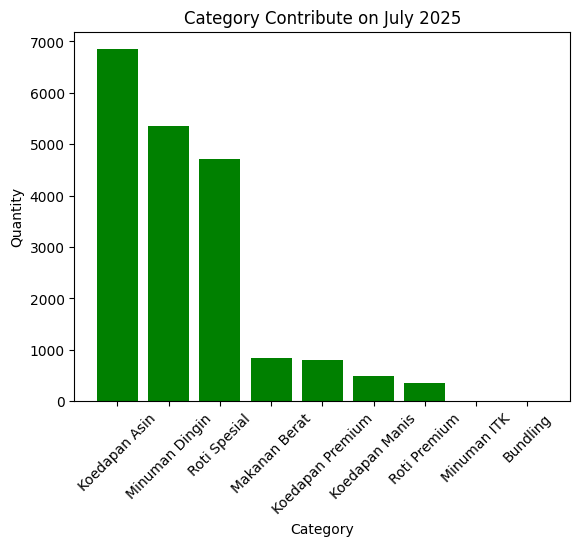

In [47]:
plt.bar(category_sum['Category'], category_sum['Quantity'], color='green')
plt.title("Category Contribute on July 2025")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.show()

In [41]:
# -------------- Product Quantity Distribution -----------------------

product_sum = df_clean.groupby('Product')['Quantity'].sum().reset_index()
product_sum = product_sum.sort_values(by='Quantity', ascending=False)
product_sum

,Product,Quantity
17,Le Minerale 600 ML,4363.0
35,Risol Mayo,2288.0
48,Roti Pizza,1422.0
30,Panada,1008.0
19,Lemper,882.0
...,...,...
42,Roti Ham n Cheese,2.0
52,Roti Sisir Pandan,2.0
7,Bundling 1,1.0
9,Chocolate Bread,1.0


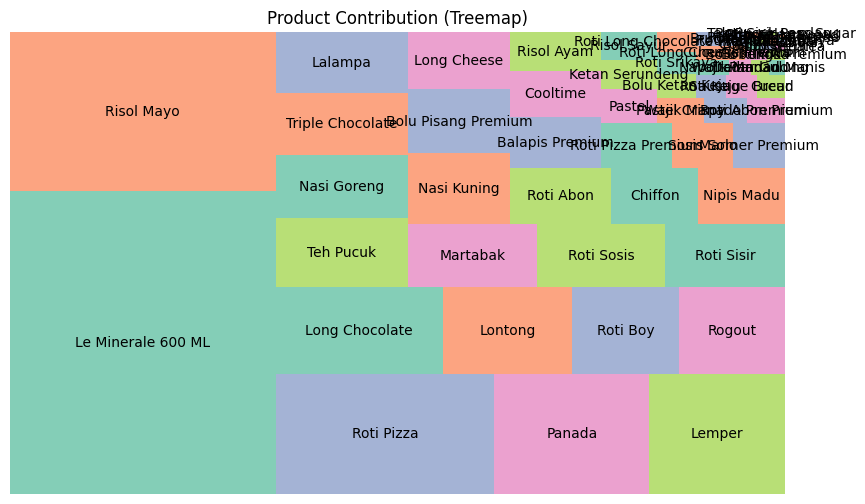

In [54]:
plt.figure(figsize=(10,6))
squarify.plot(sizes=product_sum['Quantity'], label=product_sum['Product'], alpha=0.8, color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854'])
plt.axis('off')
plt.title("Product Contribution (Treemap)")
plt.show()

In [42]:
# ------------ Payment Method Comparison -------------------

payment_method = df_clean.groupby('Payment')['Quantity'].count().reset_index()
payment_method = payment_method.sort_values(by='Quantity', ascending=False)
payment_method

,Payment,Quantity
0,Cash,5435
3,Qris Static,4619
2,Debit Card,18
1,Dana,1


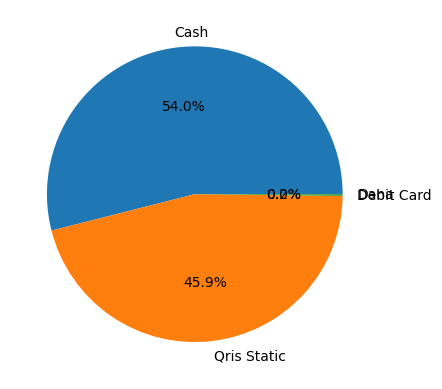

In [45]:
plt.pie(payment_method['Quantity'], labels = payment_method['Payment'], autopct='%1.1f%%', center=(0.5, 0.3))
plt.show()